In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('german_credit_data .csv')

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [4]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
df.fillna(method = "ffill",inplace = True)

In [6]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     1
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()


Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        999 non-null    int64 
 1   Age               999 non-null    int64 
 2   Sex               999 non-null    object
 3   Job               999 non-null    int64 
 4   Housing           999 non-null    object
 5   Saving accounts   999 non-null    object
 6   Checking account  999 non-null    object
 7   Credit amount     999 non-null    int64 
 8   Duration          999 non-null    int64 
 9   Purpose           999 non-null    object
dtypes: int64(5), object(5)
memory usage: 85.9+ KB


In [16]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,moderate,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,little,little,9055,36,education
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,little,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

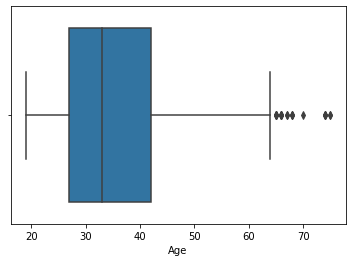

In [18]:
import seaborn as sns
sns.boxplot(df["Age"])

In [19]:
df["Age"].skew()

1.0189759354091126

In [21]:
Q1 = df["Age"].quantile(0.25)
Q1

27.0

In [23]:
Q3 = df["Age"].quantile(0.75)
Q3

42.0

In [25]:
iqr = Q3-Q1
iqr

15.0

In [27]:
ll = Q1-1.5*iqr
ll

4.5

In [28]:
ul = Q3+1.5*iqr
ul

64.5

In [29]:
df["Age"] = np.where(df["Age"]<ll,
                    ll,
                    np.where(df["Age"]>ul,
                            ul,
                            df["Age"]))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

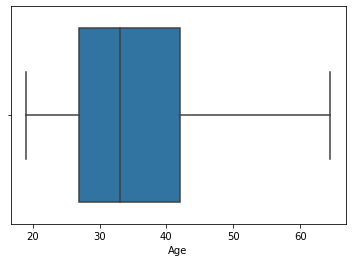

In [30]:
sns.boxplot(df["Age"])

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

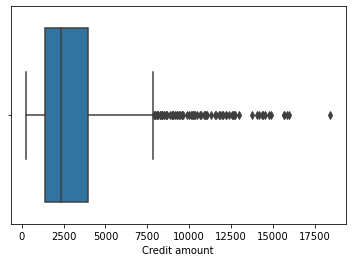

In [31]:
sns.boxplot(df['Credit amount'])

In [32]:
df['Credit amount'].skew()

1.9484551826368204

In [35]:
Q1 = df['Credit amount'].quantile(0.25)
print(Q1)
Q3 = df['Credit amount'].quantile(0.75)
Q3

1368.5


3972.5

In [36]:
iqr = Q3-Q1
iqr

2604.0

In [37]:
ll = Q1-1.5*iqr
ll

-2537.5

In [38]:
ul = Q3+1.5*iqr
ul

7878.5

In [39]:
df['Credit amount'] = np.where(df['Credit amount']<ll,
                              ll,
                              np.where(df['Credit amount']>ul,
                                      ul,
                                      df['Credit amount']))

C:\Users\CS-L2-PC08\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit amount'>

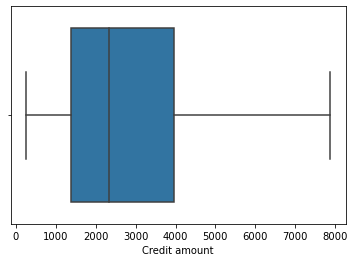

In [40]:
sns.boxplot(df['Credit amount'])

In [41]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22.0,female,2,own,little,moderate,5951.0,48,radio/TV
2,2,49.0,male,1,own,little,moderate,2096.0,12,education
3,3,45.0,male,2,free,little,little,7878.5,42,furniture/equipment
4,4,53.0,male,2,free,little,little,4870.0,24,car
5,5,35.0,male,1,free,little,little,7878.5,36,education
...,...,...,...,...,...,...,...,...,...,...
995,995,31.0,female,1,own,little,little,1736.0,12,furniture/equipment
996,996,40.0,male,3,own,little,little,3857.0,30,car
997,997,38.0,male,2,own,little,little,804.0,12,radio/TV
998,998,23.0,male,2,free,little,little,1845.0,45,radio/TV


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        999 non-null    int64  
 1   Age               999 non-null    float64
 2   Sex               999 non-null    object 
 3   Job               999 non-null    int64  
 4   Housing           999 non-null    object 
 5   Saving accounts   999 non-null    object 
 6   Checking account  999 non-null    object 
 7   Credit amount     999 non-null    float64
 8   Duration          999 non-null    int64  
 9   Purpose           999 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 85.9+ KB


In [45]:
x = pd.DataFrame(df.iloc[:,[1,2,3,4,5,6,8,9]])

In [46]:
x

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose
1,22.0,female,2,own,little,moderate,48,radio/TV
2,49.0,male,1,own,little,moderate,12,education
3,45.0,male,2,free,little,little,42,furniture/equipment
4,53.0,male,2,free,little,little,24,car
5,35.0,male,1,free,little,little,36,education
...,...,...,...,...,...,...,...,...
995,31.0,female,1,own,little,little,12,furniture/equipment
996,40.0,male,3,own,little,little,30,car
997,38.0,male,2,own,little,little,12,radio/TV
998,23.0,male,2,free,little,little,45,radio/TV


In [47]:
y = df.iloc[:,-3]

In [48]:
y

1      5951.0
2      2096.0
3      7878.5
4      4870.0
5      7878.5
        ...  
995    1736.0
996    3857.0
997     804.0
998    1845.0
999    4576.0
Name: Credit amount, Length: 999, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.80,random_state=2)

In [51]:
x_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose
176,42.0,male,2,own,little,little,12,furniture/equipment
819,26.0,male,2,own,little,little,18,radio/TV
678,64.0,male,1,rent,little,little,24,radio/TV
952,28.0,female,2,rent,quite rich,moderate,24,car
201,27.0,male,1,own,little,little,12,car
...,...,...,...,...,...,...,...,...
535,33.0,male,2,rent,little,rich,21,education
585,20.0,female,2,rent,little,little,18,furniture/equipment
494,39.0,male,1,rent,little,little,12,car
528,31.0,male,2,rent,little,little,36,radio/TV


In [52]:
x_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose
38,37.0,male,2,own,little,rich,10,domestic appliances
727,25.0,female,2,rent,little,little,18,radio/TV
847,28.0,male,2,own,little,moderate,24,car
296,20.0,female,2,rent,little,moderate,12,car
925,46.0,male,2,own,little,little,12,car
...,...,...,...,...,...,...,...,...
840,29.0,male,2,own,little,little,36,furniture/equipment
811,28.0,male,1,own,little,moderate,6,radio/TV
931,22.0,female,2,own,little,moderate,9,radio/TV
617,37.0,male,2,rent,little,little,6,car


In [53]:
y_train

176    2577.0
819    1345.0
678    2384.0
952    4113.0
201    1168.0
        ...  
535    2319.0
585    2039.0
494    2122.0
528    2302.0
169    1935.0
Name: Credit amount, Length: 799, dtype: float64

In [54]:
y_test

38     1225.0
727    1882.0
847    1249.0
296    4675.0
925     697.0
        ...  
840    5179.0
811     484.0
931    1670.0
617    3676.0
810     907.0
Name: Credit amount, Length: 200, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn. import 